In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [2]:
df=pd.read_csv("car_price.csv")
df.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
df=df.drop(columns=["car_ID"])
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# finding missing value

In [5]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<Axes: ylabel='Frequency'>

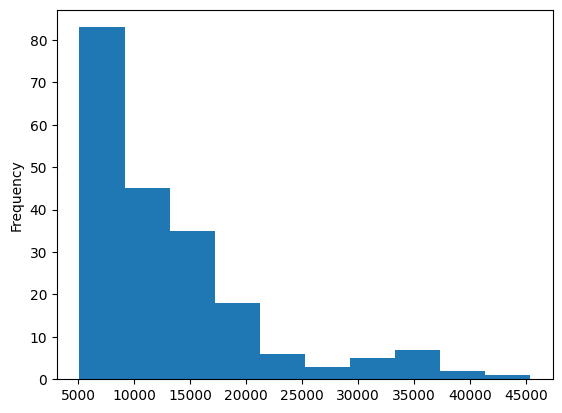

In [7]:
df["price"].plot.hist()

<Axes: >

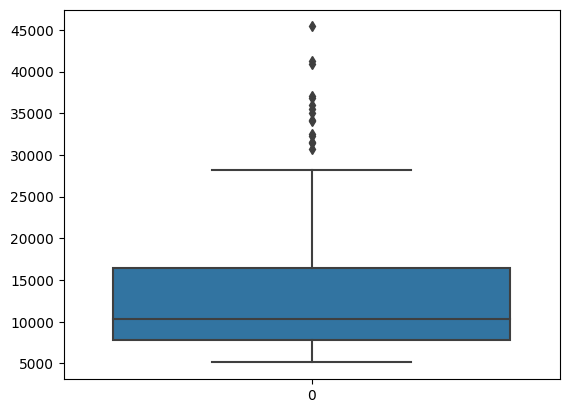

In [8]:
sns.boxplot(df["price"])

In [10]:
q1=df["price"].quantile(0.20)
q3=df["price"].quantile(0.75)
IQR=q3-q1
IQR

9117.2

In [11]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
upper_limit,lower_limit

(30178.800000000003, -6290.000000000001)

In [12]:
def imputer(value):
    if value>upper_limit:
        return upper_limit
    if value>lower_limit:
        return lower_limit
    else:
        return value

In [13]:
df["price"]=df["price"].apply(imputer)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# Saparating x and y

In [15]:
x=df.drop(columns=["price"])
y=df["price"]

In [16]:
categorical=x.select_dtypes(include=["object"])

# Dummy encoding

In [18]:
dummy=pd.get_dummies(categorical,drop_first=True)
x=x.drop(list(categorical.columns),axis=1)
x=pd.concat([x,dummy],axis=1)

In [24]:
import sklearn
print(sklearn.__version__)

1.3.0


In [26]:
from sklearn.model_selection import train_test_split as tts

In [27]:
x_train,x_test,y_train,y_test=tts(x,y,random_state=101)

In [29]:
from sklearn.tree import DecisionTreeRegressor
model =DecisionTreeRegressor()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
#Decision Tree Regressor= tries to predict a continuous target variable by cutting the feature variables into small zones, and each zone will have one prediction

In [34]:
from sklearn.metrics import mean_absolute_error
model.score(x_test,predictions)  
#model.score automates the prediction of your data using X_test and compares it with Y_test

1.0

In [40]:
df=df.drop_duplicates()

# Visualizing the data

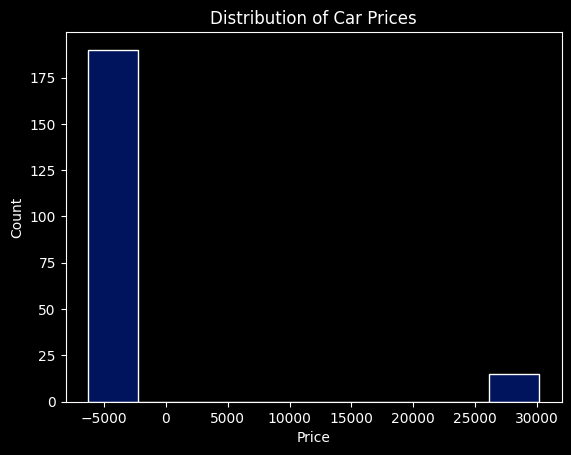

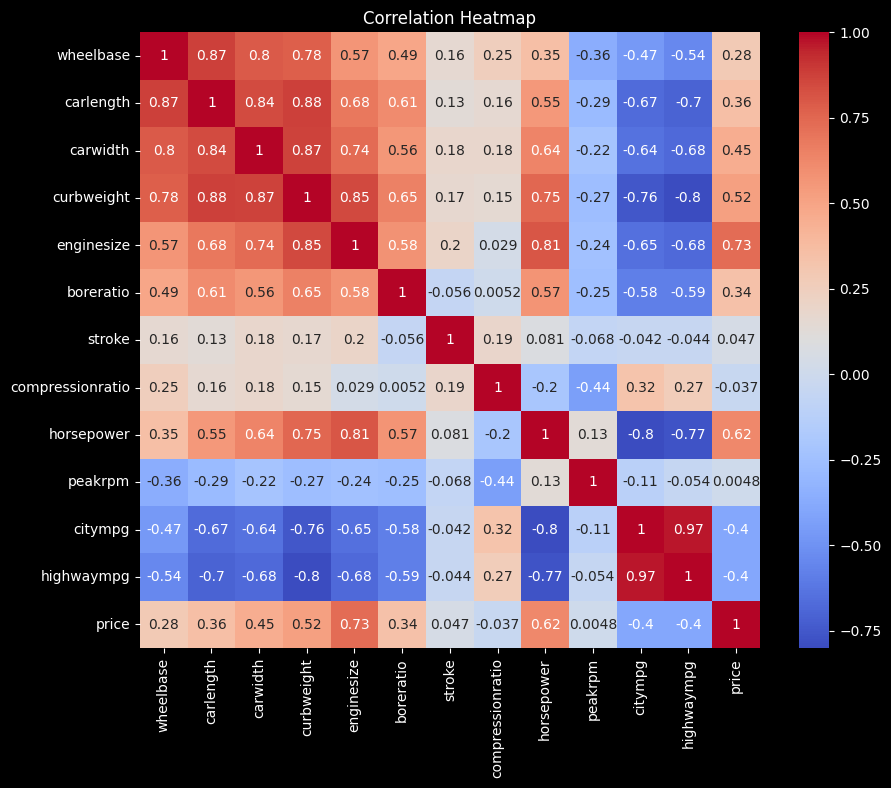

In [44]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(df['price'])
plt.title('Distribution of Car Prices',color='white')
plt.xlabel('Price',color='white')
plt.ylabel('Count',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()
numeric_features=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
correlation_matrix=df[numeric_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


# Preprocessing Data

In [47]:
feature_cols=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
              'wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber',
              'enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm',
              'citympg','highwaympg']
target_col='price'
x=df[feature_cols]
y=df[target_col]

In [61]:
label_encoder=LabelEncoder()
for col in x.columns:
    if x[col].dtype=='object':
        x[col]=label_encoder.fit_transform(x[col])

C:\Users\Dhruvi\AppData\Local\Temp\ipykernel_24356\729150506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=label_encoder.fit_transform(x[col])
C:\Users\Dhruvi\AppData\Local\Temp\ipykernel_24356\729150506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=label_encoder.fit_transform(x[col])
C:\Users\Dhruvi\AppData\Local\Temp\ipykernel_24356\729150506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

# Splitting Data

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)                            

# Fitting the model

In [64]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Evaluating the model

In [67]:
predictions=model.predict(x_test)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print("ROOT MEAN SQUARED ERROR: ",rmse)

ROOT MEAN SQUARED ERROR:  7333.594453072763


# Deployement and Prediction

In [74]:
new_car_data=[[3,'gas','std','two','seadan','fwd','front',100.0,180.0,68.0,56.0,2500,'obc','four',
              120,'mpfi',3.50,2.80,8.5,110,5500,30,38]]
new_car_df=pd.DataFrame(new_car_data,columns=feature_cols)
new_car_encoded=pd.get_dummies(new_car_df)
new_car_encoded=new_car_encoded.reindex(columns=x_train.columns,fill_value=0)
predicted_price=model.predict(new_car_encoded)
print("PREDICTED PRICE OF THE CAR:",predicted_price)


PREDICTED PRICE OF THE CAR: [15355.42236932]
